In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt

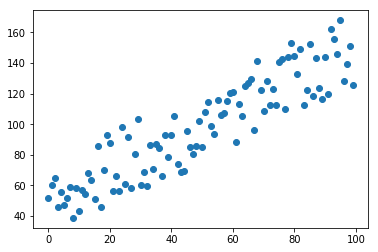

In [5]:
def gen_data(n, bias, varianza):
    x = []
    y = []
    for i in range(0, n):
        x.append(i)
        y.append((i + bias) + random.uniform(0, 1) * varianza)
    return x, y

x,y = gen_data(100, 25, 50)
plt.scatter(x, y)

In [6]:
def coste(x, y, a, b):
    m = len(x)
    error = 0.0
    for i in range(m):
        hipotesis = a+b*x[i]
        error +=  (y[i] - hipotesis) ** 2
    return error / (2*m)

In [7]:
def descenso_gradiente(x, y, a, b, alpha, epochs):
    m = len(x)
    hist_coste = []
    for ep in range(epochs):
        b_deriv = 0
        a_deriv = 0
        for i in range(m):
            hipotesis = a+b*x[i]
            a_deriv += hipotesis - y[i]
            b_deriv += (hipotesis - y[i]) * x[i]
            hist_coste.append(coste(x, y, a, b))
        a -= (a_deriv / m) * alpha
        b -= (b_deriv / m) * alpha
        
    return a, b, hist_coste

In [28]:
a=1
b=1
alpha = 0.0001
iters = 100000
a,b, hist_coste = descenso_gradiente(x, y, a, b, alpha, iters)
a,b

(43.41993518666135, 1.08466250771225)

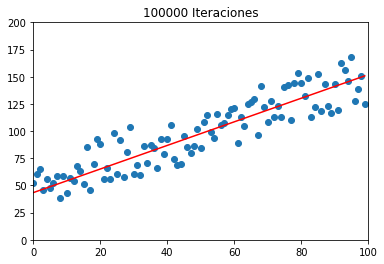

In [29]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [a+b*0, a+b*max(x)]
plt.title('100000 Iteraciones')
plt.axis([0, 100, 0, 200]) 
plt.plot(pred_x, pred_y, "r")

In [30]:
def pred(a, b, val):
    return a+b*val

pred (a, b, 50)

97.65306057227386

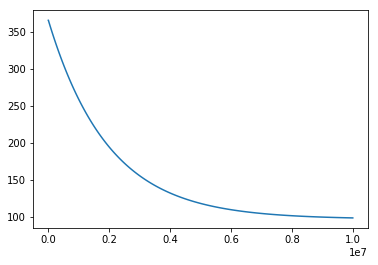

In [31]:
x_base = range(len(hist_coste))
plt.plot(x_base[1000:], hist_coste[1000:])